In [1]:
#| echo: false

%config InlineBackend.figure_format = 'retina'

The state-space is built as a graph using an simple API and take up very little space compared to a matrix representation. It handles millions of vertices (states) and edges (transitions) and is munch faster than the traditional matrix-based computation relying on (sparse) matrix inversion and exponentiation. 

Consider this model: Rabbits jump between two islands at a rate of one. The two islands are flooded at rates 2 and 4 drowning all rabbits on the flooded island. The end (absorbing) is when no more rabbits are left.

::: {#rabbit-island-model }

![](images/rabbits.png){width="50%"}

Rabbit island model.
:::

In **ptdalgorithms**, each state is represented by a sequence of integers. To represent states in the rabbit model, we only need two such integer to represent the number of rabbits on the left and right islands. Laid out as in the above picture, the states are:

```
[2, 0]    [0, 1]

[1, 1]    [0, 0]

[0, 2]    [1, 0]
```

To skip some of the boilerplate you can pass a callback function and an initial state to [Graph](`ptdalgorithms.Graph`). The callback function must take as the only argument a list of int representing a state, and return: a list of tuples that each represent reachable child state and the associated transition rate. To create a callback function, just think of rules of your model and ask yourself: 

> Given some specific state, what are the allowed transitions to other states and at what rates to these transititons occur?

Here is an example for our rabbit model: If the current state is "two rabbits on the left island" (`[2, 0]`), the reachable states are: "one rabbit on each island" (`[1, 1]`) if one rabbit jumps and and "no rabbits" (`[0, 0]`) if the island is flodded. So if the callback function is called like this: 

```python
rabbit_model([2, 0])
```

it should return

```python
[([1, 1], 1), ([0, 0], 2)]
```

Together, the callback and initial state fully specifies the model. Here is what they look like for the rabbit model:

In [10]:
nr_rabbits, flood_left, flood_right = 2, 2, 4

def rabbit_islands(state):
    nr_left, nr_right = state
    reachable = []
    if state[0] > 0:
        reachable.append(([nr_left-1, nr_right+1], 1))
        reachable.append(([0,         nr_right  ], flood_left))
    if state[1] > 0:   
        reachable.append(([nr_left+1, nr_right-1], 1))
        reachable.append(([nr_left,   0         ], flood_right))
    return reachable

initial_state = [nr_rabbits, 0]  

::: {.column-margin}

![If you know the coalescent, [this](coalescent_showcase.ipynb) introduction may be more motivating](images/coalescent.png)

:::

To then build the state space all you need to do is:

In [11]:
import ptdalgorithms as ptd

graph = ptd.Graph(callback=rabbit_islands, initial=initial_state)

Plot it to make sure it looks as expected. The gray `S` state is the "starting state" immediately transiting one or more model states where the model is allowed to begin. In the rabbit model, `S` goes to state `2,0` with probability 1 because the model can only begin there. The end (absorbing) state `0,0` is also colored gray.

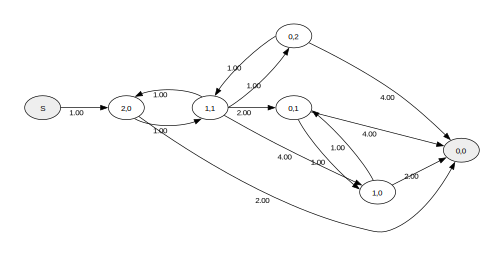

In [13]:
graph.plot()

## Off to the races

Now the world is at your command. To scratch the surfance you can compute the expected time to rabbit extinction:

In [15]:
graph.expectation()

0.5038265306122448

but there is so much more you can do to explore your rabbit model. For a full exposé of the API using the rabbit example see [the full python API example](../examples/rabbits_full_api_example.ipynb).

::: {.callout-caution }
## This pages is under construction

:::



## Learning more

- See [Python API walk through](../examples/rabbits_full_api_example.ipynb) for a full example of the Python API.
- See [R API walk through](../examples/full_r_api_example.ipynb) for a full example of the R API.

## Citing ptdalgorithms

[Graph-based algorithms for phase-type distributions, Statistics and Computing (2022)](https://doi.org/10.1007/s11222-022-10174-3)

